In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.precision", 2)

In [23]:
df = pd.read_csv("telecom_churn.csv")
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [3]:
print(df.shape)

(3333, 20)


In [5]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [7]:
# Statistical characteristics of each numerical feature
df.describe()

Account length  Area code  Number vmail messages  Total day minutes  \
count         3333.00    3333.00                3333.00            3333.00   
mean           101.06     437.18                   8.10             179.78   
std             39.82      42.37                  13.69              54.47   
min              1.00     408.00                   0.00               0.00   
25%             74.00     408.00                   0.00             143.70   
50%            101.00     415.00                   0.00             179.40   
75%            127.00     510.00                  20.00             216.40   
max            243.00     510.00                  51.00             350.80   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count          3333.00           3333.00            3333.00          3333.00   
mean            100.44             30.56             200.98           100.11   
std              20.07              9.26              50.71            19.92   
min               0.00              0.00               0.00             0.00   
25%              87.00             24.43             166.60            87.00   
50%             101.00             30.50             201.40           100.00   
75%             114.00             36.79             235.30           114.00   
max             165.00             59.64             363.70           170.00   

       Total eve charge  Total night minutes  Total night calls  \
count           3333.00              3333.00            3333.00   
mean              17.08               200.87             100.11   
std                4.31                50.57              19.57   
min                0.00                23.20              33.00   
25%               14.16               167.00              87.00   
50%               17.12               201.20             100.00   
75%               20.00               235.30             113.00   
max               30.91               395.00             175.00   

       Total night charge  Total intl minutes  Total intl calls  \
count             3333.00             3333.00           3333.00   
mean                 9.04               10.24              4.48   
std                  2.28                2.79              2.46   
min                  1.04                0.00              0.00   
25%                  7.52                8.50              3.00   
50%                  9.05               10.30              4.00   
75%                 10.59               12.10              6.00   
max                 17.77               20.00             20.00   

       Total intl charge  Customer service calls  
count            3333.00                 3333.00  
mean                2.76                    1.56  
std                 0.75                    1.32  
min                 0.00                    0.00  
25%                 2.30                    1.00  
50%                 2.78                    1.00  
75%                 3.27                    2.00  
max                 5.40                    9.00

In [8]:
# Statistical characteristics of non-numerical boolean features
df.describe(include=["object", "bool"])

State International plan Voice mail plan  Churn
count   3333               3333            3333   3333
unique    51                  2               2      2
top       WV                 No              No  False
freq     106               3010            2411   2850

In [26]:
# Lets see the distribution of Churn
df["Churn"].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [27]:
df["Churn"].value_counts(normalize=True)

Churn
0    0.86
1    0.14
Name: proportion, dtype: float64

Sorting a Data Frame

In [11]:
df.sort_values(by=["Churn", "Total day charge"], ascending=[True, False]).head()

State  Account length  Area code International plan Voice mail plan  \
688     MN              13        510                 No             Yes   
2259    NC             210        415                 No             Yes   
534     LA              67        510                 No              No   
575     SD             114        415                 No             Yes   
2858    AL             141        510                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
688                      21              315.6              105   
2259                     31              313.8               87   
534                       0              310.4               97   
575                      36              309.9               90   
2858                     28              308.0              123   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
688              53.65              208.9               71             17.76   
2259             53.35              147.7              103             12.55   
534              52.77               66.5              123              5.65   
575              52.68              200.3               89             17.03   
2858             52.36              247.8              128             21.06   

      Total night minutes  Total night calls  Total night charge  \
688                 260.1                123               11.70   
2259                192.7                 97                8.67   
534                 246.5                 99               11.09   
575                 183.5                105                8.26   
2858                152.9                103                6.88   

      Total intl minutes  Total intl calls  Total intl charge  \
688                 12.1                 3               3.27   
2259                10.1                 7               2.73   
534                  9.2                10               2.48   
575                 14.2                 2               3.83   
2858                 7.4                 3               2.00   

      Customer service calls  Churn  
688                        3  False  
2259                       3  False  
534                        4  False  
575                        1  False  
2858                       1  False

Indexing and retrieving data

In [12]:
# What is the proportion of churned users in our dataframe?

df['Churn'].mean()

0.14491449144914492

Boolean indexing

Using boolean conditions to filter rows of a dataframe, based on a certain criteria.
This is achieved thru creating Series of True and False values, that represent whether each element in a Dataframe meets a particular condition. 

In [38]:
# What are average values of numerical features for churned users?

# Let's convert Churn to integer datatype
df["Churn"] = df["Churn"].astype("int64")
# to get columns (features) with numerical datatypes
numerical_cols = df.select_dtypes(include=np.number).columns
df[df["Churn"] == 1][numerical_cols].mean()


Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

In [39]:
# How much time (on average) do churned users spend on the phone during daytime?

df[df["Churn"]==1]["Total day minutes"].mean()

206.91407867494823

In [40]:
''' What is the maximum length of international calls among loyal users (Churn == 0) 
who do not have an international plan? '''

df[(df["Churn"] == 0) & (df["International plan"] == "No")]["Total intl minutes"].max()

18.9

DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The loc method is used for indexing by name, while iloc() is used for indexing by number.

In [41]:
''' display the values of the rows with index from 0 to 5 (inclusive) and columns 
labeled from State to Area code (inclusive) '''
df.loc[0:5, "State":"Area code"]

State  Account length  Area code
0    KS             128        415
1    OH             107        415
2    NJ             137        415
3    OH              84        408
4    OK              75        415
5    AL             118        510

In [42]:
'''
display the values of the first five rows in the first three columns
'''
df.iloc[0:5,0:3]

State  Account length  Area code
0    KS             128        415
1    OH             107        415
2    NJ             137        415
3    OH              84        408
4    OK              75        415

In [43]:
# Applying functions to cells, columns and rows

# applying to columns
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

In [44]:
# applying to rows. To achieve this, one needs to specify axis = 1
# select all states starting with M
df[df["State"].apply(lambda state: state[0] == "M")].head()

State  Account length  Area code International plan Voice mail plan  \
6     MA             121        510                 No             Yes   
7     MO             147        415                Yes              No   
13    MT              95        510                 No              No   
27    MT              54        408                 No              No   
28    MO              20        415                 No              No   

    Number vmail messages  Total day minutes  Total day calls  \
6                      24              218.2               88   
7                       0              157.0               79   
13                      0              156.6               88   
27                      0              134.3               73   
28                      0              190.0              109   

    Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
6              37.09              348.5              108             29.62   
7              26.69              103.1               94              8.76   
13             26.62              247.6               75             21.05   
27             22.83              155.5              100             13.22   
28             32.30              258.2               84             21.95   

    Total night minutes  Total night calls  Total night charge  \
6                 212.6                118                9.57   
7                 211.8                 96                9.53   
13                192.3                115                8.65   
27                102.1                 68                4.59   
28                181.5                102                8.17   

    Total intl minutes  Total intl calls  Total intl charge  \
6                  7.5                 7               2.03   
7                  7.1                 6               1.92   
13                12.3                 5               3.32   
27                14.7                 4               3.97   
28                 6.3                 6               1.70   

    Customer service calls  Churn  
6                        3      0  
7                        0      0  
13                       3      0  
27                       3      0  
28                       0      0

map method can be used to replace values in a column by passing a dictionary of the form {old_value: new_value} as its argument.
same can be done using the replace method

In [45]:
d = {"No": False, "Yes": True}
df["International plan"] = df["International plan"].map(d)
df.head()

# df = df.replace({"Voice mail plan": d})

State  Account length  Area code  International plan Voice mail plan  \
0    KS             128        415               False             Yes   
1    OH             107        415               False             Yes   
2    NJ             137        415               False              No   
3    OH              84        408                True              No   
4    OK              75        415                True              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

### Grouping 

df.groupby(by=grouping_columns)[columns_to_show].function()

1. The groupby method divides the grouping_columns by their values. They become a new index in the resulting dataframe.
2. Columns of interest are selected (columns_to_show). If columns_to_show is not included, all non groupby clauses will be included.
3. One or several functions are applied to the obtained groups per selected columns.

In [46]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].describe(percentiles=[])

Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

In [51]:
df.groupby(df["State"] == 'AZ')[columns_to_show].describe(percentiles=[])

Total day minutes                                     Total eve minutes  \
                  count    mean    std   min     50%    max             count   
State                                                                           
False            3269.0  179.94  54.51   0.0  179.80  350.8            3269.0   
True               64.0  171.60  51.94  58.9  171.45  281.1              64.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
State                                                                         
False  201.24  50.72   0.0  201.6  363.7              3269.0  201.01  50.50   
True   187.75  49.07  72.9  191.1  328.7                64.0  194.00  54.39   

                           
        min    50%    max  
State                      
False  23.2  201.3  395.0  
True   77.3  191.4  297.9

In [52]:
df.groupby(["State"])[columns_to_show].describe(percentiles=[])

Total day minutes                                     Total eve minutes  \
                  count    mean    std   min     50%    max             count   
State                                                                           
AK                 52.0  178.38  49.64  58.2  177.25  278.4              52.0   
AL                 80.0  186.01  51.47  68.7  190.25  308.0              80.0   
AR                 55.0  176.12  50.37  55.3  170.70  273.4              55.0   
AZ                 64.0  171.60  51.94  58.9  171.45  281.1              64.0   
CA                 34.0  183.56  47.74  92.8  183.20  280.0              34.0   
CO                 66.0  178.71  59.81  30.9  180.90  350.8              66.0   
CT                 74.0  175.14  60.52  37.8  176.50  321.6              74.0   
DC                 54.0  171.38  57.16  51.5  169.20  306.2              54.0   
DE                 61.0  174.58  52.06  46.5  179.90  334.3              61.0   
FL                 63.0  179.53  57.47  47.7  181.80  288.1              63.0   
GA                 54.0  185.03  53.74  71.2  193.30  299.5              54.0   
HI                 53.0  175.96  54.83  41.9  181.40  291.6              53.0   
IA                 44.0  177.61  48.40  88.1  168.80  308.6              44.0   
ID                 73.0  178.62  52.79  55.6  181.60  274.4              73.0   
IL                 58.0  173.59  49.80  69.1  180.35  269.6              58.0   
IN                 71.0  196.53  51.96  49.9  203.80  300.4              71.0   
KS                 70.0  191.56  58.14  27.0  191.25  321.3              70.0   
KY                 59.0  173.75  54.94  73.8  170.50  314.6              59.0   
LA                 51.0  178.38  45.44  58.4  179.30  310.4              51.0   
MA                 65.0  180.10  51.29  58.9  178.10  293.7              65.0   
MD                 70.0  197.23  58.03  78.1  198.15  321.1              70.0   
ME                 62.0  185.26  52.71  58.8  193.80  322.3              62.0   
MI                 73.0  180.59  54.87  18.9  185.30  314.1              73.0   
MN                 84.0  183.35  56.63  50.6  178.60  317.8              84.0   
MO                 63.0  170.51  58.08  45.0  165.90  335.5              63.0   
MS                 65.0  177.93  61.63  70.7  166.50  313.2              65.0   
MT                 68.0  174.01  48.85  89.8  162.30  273.2              68.0   
NC                 68.0  185.15  56.22  54.7  189.80  322.3              68.0   
ND                 62.0  187.34  45.25  82.5  191.25  295.3              62.0   
NE                 61.0  177.47  52.60  34.0  180.90  272.7              61.0   
NH                 56.0  177.33  59.96  17.6  182.85  322.4              56.0   
NJ                 68.0  196.22  48.61  40.9  193.05  301.5              68.0   
NM                 62.0  171.43  44.93  69.1  169.05  286.7              62.0   
NV                 66.0  176.43  56.56  67.4  168.70  303.9              66.0   
NY                 83.0  175.11  56.79  60.6  166.40  346.8              83.0   
OH                 78.0  183.27  55.76   7.8  185.60  345.3              78.0   
OK                 61.0  179.91  61.73   2.6  179.20  329.8              61.0   
OR                 78.0  176.25  56.01  12.5  186.40  324.7              78.0   
PA                 45.0  188.38  55.14  35.1  205.10  288.7              45.0   
RI                 65.0  167.48  55.42  40.4  167.80  286.2              65.0   
SC                 60.0  166.44  63.59  19.5  157.75  322.5              60.0   
SD                 60.0  189.69  55.37   0.0  186.55  328.1              60.0   
TN                 53.0  175.77  50.61  54.8  170.10  305.2              53.0   
TX                 72.0  181.52  57.15  59.5  181.30  326.5              72.0   
UT                 72.0  183.57  53.80  63.2  187.40  285.7              72.0   
VA                 77.0  177.24  49.27  44.9  174.50  283.4              77.0   
VT                 73.0  182.03  52.0

Summary tables

These help to see how the data points are distributed in the context of one or more variables(features)

i) the crosstab function is used to compute a cross-tabulation of two or more factors. It is a convenient way to analyze the relationship between two or more categorical variables. 

In [53]:
pd.crosstab(df["Churn"], df["International plan"])

International plan  False  True 
Churn                           
0                    2664    186
1                     346    137

In [54]:
pd.crosstab(df["Churn"], df["International plan"], normalize=True)

International plan  False  True 
Churn                           
0                     0.8   0.06
1                     0.1   0.04

In [55]:
# Using pivot tables

'''
the pivot_table method takes the following parameters:

values -> a list of variables to calculate statistics for,
index -> a list of variables to group data by,
aggfunc -> what statistics we need to calculate for groups, eg. sum, mean, maximum, minimum
'''

df.pivot_table(
    ["Total day calls", "Total eve calls", "Total night calls"],
    ["Area code"],
    aggfunc="mean",
)

Total day calls  Total eve calls  Total night calls
Area code                                                     
408                 100.50            99.79              99.04
415                 100.58           100.50             100.40
510                 100.10            99.67             100.60

In [56]:
df.pivot_table(
    ["Total day calls", "Total eve calls", "Total night calls"],
    ["State"],
    aggfunc="mean",
)

Total day calls  Total eve calls  Total night calls
State                                                     
AK               95.27            96.58              97.35
AL               99.10            98.46              98.61
AR              102.15            97.84              99.05
AZ              100.11           102.41              99.98
CA              104.50           103.09              99.21
CO               95.12            98.17              97.06
CT               98.43            99.12             102.28
DC              100.17           101.98              97.67
DE               98.64            97.36             101.21
FL              101.00           108.92             100.33
GA              103.06           103.89             105.43
HI              102.81            98.85              99.15
IA              103.05            99.55             100.14
ID              106.22           100.05             100.42
IL              101.69           100.81              99.22
IN              107.06            97.94             101.93
KS              101.03           101.53              99.03
KY              100.34            98.24             101.69
LA              103.51            96.63              99.59
MA              102.29            98.23              96.60
MD               99.36            98.57              95.76
ME               99.50           104.60              98.97
MI              101.21           101.99             102.63
MN               99.12           101.64             102.13
MO               99.94           101.05             101.27
MS              100.71           100.20             100.89
MT               95.22            97.51             102.38
NC              102.79           103.94             100.50
ND              100.15           105.47             102.27
NE               97.41           103.59             101.64
NH               98.96            95.80              96.68
NJ              100.10           103.44             100.15
NM              102.24           102.98             100.87
NV              101.42            96.26             101.36
NY               98.24           100.02              99.41
OH               99.63           101.21             103.26
OK              100.26           104.28             100.98
OR               95.73            98.50             102.68
PA               98.64           101.62              98.91
RI              100.43            94.97             100.34
SC              102.47            99.78             100.18
SD               94.82            98.63              94.02
TN              101.45           103.75              94.26
TX               99.99           101.90             101.04
UT               98.96            98.03             100.62
VA              105.36            99.95              94.92
VT              100.33            97.67             100.77
WA              101.20            95.74             102.91
WI               96.68            99.54             100.46
WV              103.78            98.06             100.57
WY              102.22            99.23             102.03

#### Attempts at predicting churn

In [57]:
# Let's see how churn rate is related to the International plan feature

pd.crosstab(df["Churn"], df["International plan"], margins=True)

International plan  False  True   All
Churn                                
0                    2664   186  2850
1                     346   137   483
All                  3010   323  3333

42% of those with an International plan have churned. (137/323), as compared to the 11% without, that have churned

In [58]:
# some imports to set up plotting
import matplotlib.pyplot as plt
# pip install seaborn
import seaborn as sns

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

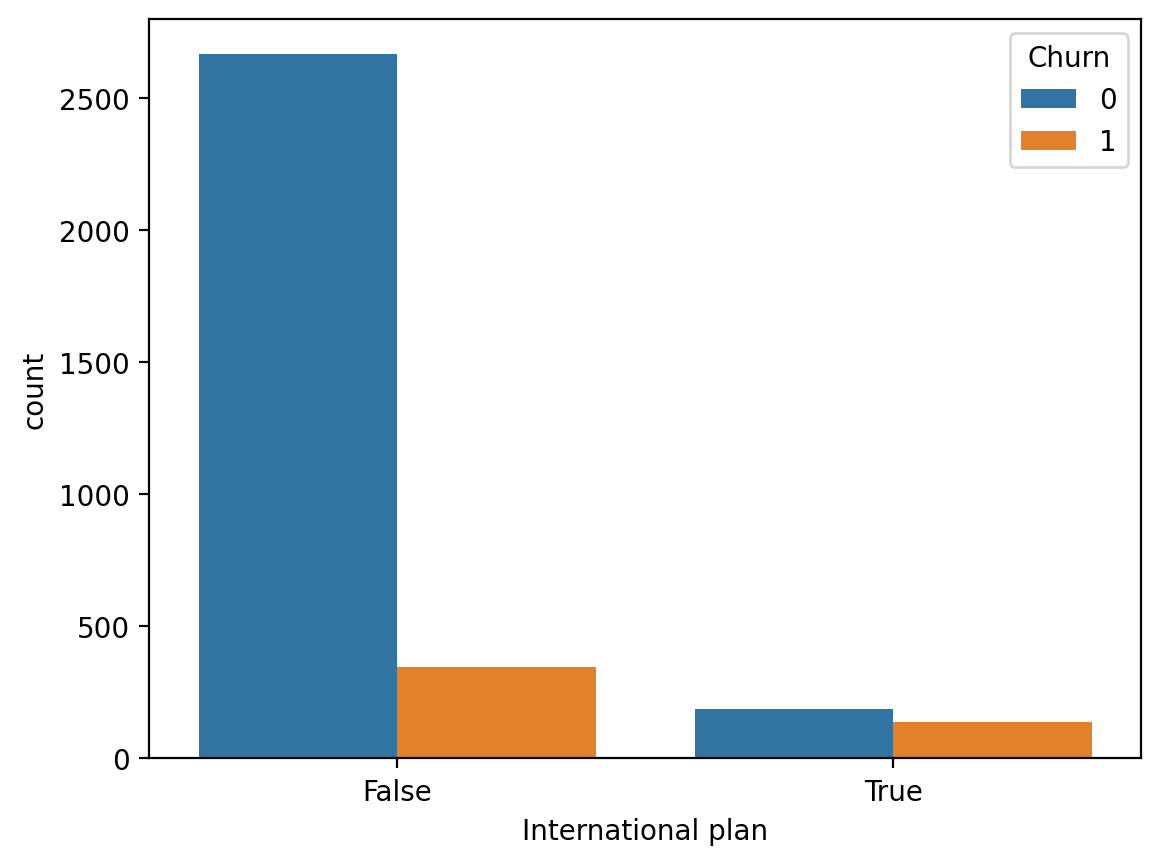

In [59]:
sns.countplot(x="International plan", hue="Churn", data=df);

With International Plan, the churn rate is much higher. Probably unexpected expenses with international calls, leading to unsatisfied customers

In [60]:
# Lets look at another feature

pd.crosstab(df["Churn"], df["Customer service calls"], margins=True)

Customer service calls    0     1    2    3    4   5   6  7  8  9   All
Churn                                                                  
0                       605  1059  672  385   90  26   8  4  1  0  2850
1                        92   122   87   44   76  40  14  5  1  2   483
All                     697  1181  759  429  166  66  22  9  2  2  3333

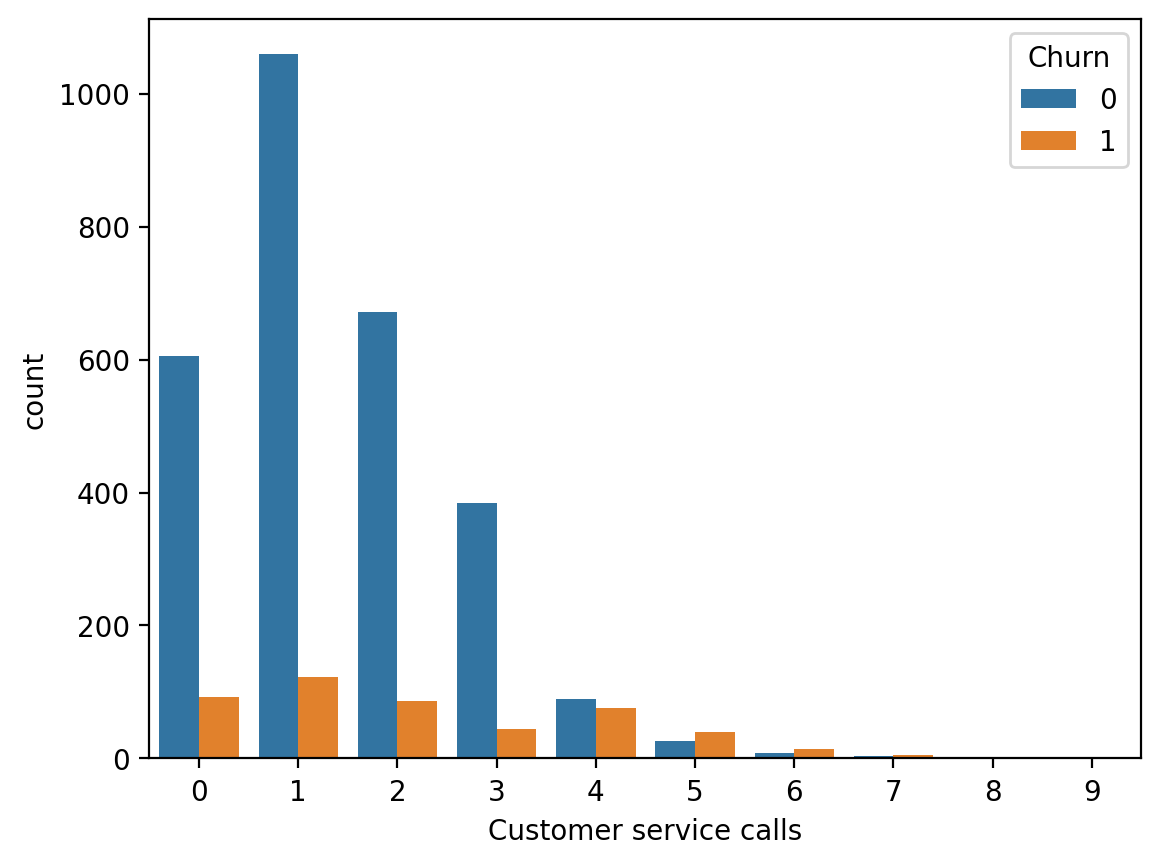

In [61]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

From the plot, one notices that churn increases with more customer service calls, especially 4 and above

In [62]:
# let's add a binary feature to our DataFrame – Customer service calls > 3

df["Many_service_calls"] = (df["Customer service calls"] > 3).astype("int")

In [70]:
df["Many_service_calls"].unique()

array([0, 1])

In [63]:
pd.crosstab(df["Many_service_calls"], df["Churn"], margins=True)

Churn                  0    1   All
Many_service_calls                 
0                   2721  345  3066
1                    129  138   267
All                 2850  483  3333

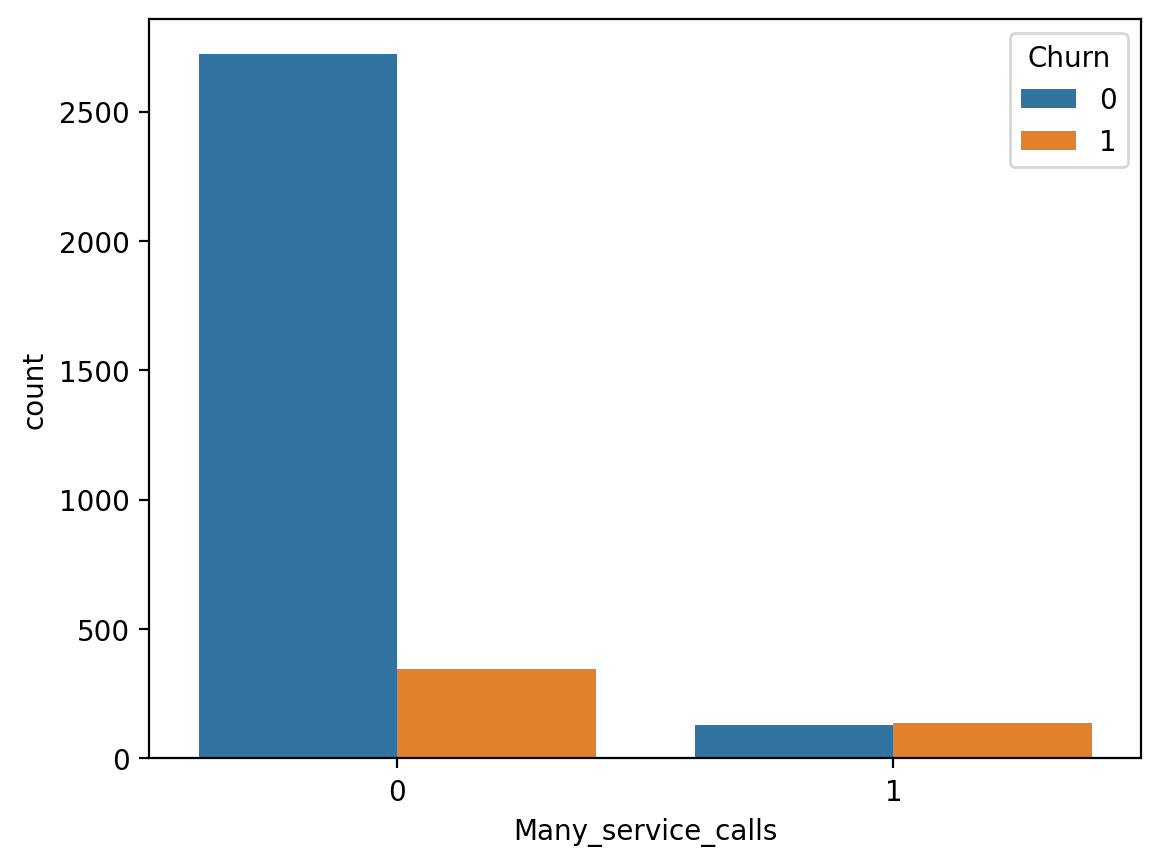

In [64]:
sns.countplot(x="Many_service_calls", hue="Churn", data=df);

The plot confirms it. The more service calls, the higher rate of churn.

We have noticed high churn rates where:-

i) Customers have made many calls to the service centers

ii) Customers with International plan

Looking at these 2 features combined, how do they relate with Churn? 

In [71]:
# examining relationship between Churn and both International plan and freshly created Many_service_calls.
pd.crosstab(df["Many_service_calls"] & df["International plan"], df["Churn"], margins=True)

Churn     0    1   All
row_0                 
False  2841  464  3305
True      9   19    28
All    2850  483  3333

The expression df["Many_service_calls"] & df["International plan"] uses the bitwise AND (&) operator to combine the boolean values from these columns. This effectively creates a new boolean Series based on the logical AND operation between the two columns.

True -> only if both are True (1)

This contingency table is to predict the possibility of a customer churning, based on these 2 features. Here's how you can calculate the accuracy:

Accuracy = (True Positives + True Negatives) / Total

True Positives (TP): 19 (Customers correctly predicted as Churn=1)

True Negatives (TN): 2841 (Customers correctly predicted as Churn=0)

False Positives (FP): 9 (Customers incorrectly predicted as Churn=1)

False Negatives (FN): 464 (Customers incorrectly predicted as Churn=0)

#### Accuracy = 85.8%

Meaning the model correctly predicts Churn around 85.8% of the time based on the given conditions.